### Computational Guided Inquiry for PChem (Neshyba, 2023)


# Visualizing $P(T,V)$


## Maxwell's thermodynamic surface
A fundamental idea of thermodynamics is the notion of _thermodynamic surfaces_. James Clerk Maxwell famously made three plaster models of a thermodynamic surface, and gave one as a present to Gibbs, shown below.

<p style='text-align: center;'>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Maxwell%27s_thermodynamic_surface%2C_commentary_book_figures_1%2C2.jpg" height="500" width="500"/>
    
__Figure 1__. Thermodynamic surface of the energy of an idealized water-like substance constructed by James Clerk Maxwell as a gift to Josiah Willard Gibbs$^1$. 
</p>

These models depict the energy of an idealized, water-like substance as a function of its volume and entropy. We'll return to the idea behind entropy later, for now the important point is that _all_ substances (real or idealized) are characterized by thermodynamic surfaces like these -- and they're really useful. Some nomenclature will help keep these ideas in mind. When we're looking at surfaces like these, the "height" is called the *state function*, and the "ground" is called the _state space_. Also, our symbol for energy is $U$, for volume $V$, and for entropy $S$. A compact description of this would be $U(V,S)$.

## Grids in Python
To get to where we need to get, we'll have to introduce the idea of a *grid*. You can think of a grid as a bunch of arrays stacked up parallel to each other. The state space variables in the figure above (the volume and the entropy) would both be represented as grids; so would the state function (the energy). Below, you'll get some practice at this. 


## Other thermodynamic surfaces
In fact, there are lots of thermodynamic surfaces that arise in thermodynamics. You've probably already encountered two important ones, both symbolized as $P(T,V)$. One is given by the ideal gas law,

$$
P(T,V) = \dfrac{n R T}{V} \ \ \ \ (1)
$$

and the other is given by vdw, 

$$
P(T,V) = {{n R T} \over {V - nb}} - {{n^2 a} \over V^2}  \ \ \ (2)
$$

Here, the state function is $P$, and the state space is ($T,V$).

So what does $P(T,V)$ look like according to Eqs. 1 and 2? If you had some plaster, you could make them, like Maxwell did. Or, you could use a computer to generate them. That's what this CGI is all about.

## The Boyle temperature
Turns out, it's pretty typical that the pressure predicted by the ideal gas law is often a little too *high* at low temperatures, and a little too *low* at high temperatures. The switch-over temperature has a name: it's called the *Boyle temperature*. If we treat a van der Waals gas as our approximation to a real gas, it turns out that we can predict the Boyle temperature quite easily: it's 

$$
T_{Boyle} \approx {a \over {Rb}} \ \ \ (3)
$$

## Learning goals
The main learning goals of this exercise can be phrased follows. 
1. I have a working understanding of what python functions are and why they are useful.
1. I know how to join strings together.
1. I can explain what a *state space* is, and I can create grids of state space variables of a desired range and number of elements.
1. I can use Python to visualize simple gas equations of state (like the ideal gas or a van der Waals gas) as a thermodynamic surface.
1. I know where, in state $T,V$ state space, ideal behavior deviates most from a "real" gas (treating van der Waals gas as real).
1. I can explain what the Boyle temperature of a gas means.
1. I can predict the Boyle temperature of a gas from its van der Waals parameters.

## References
(1) Willard Gibbs: American Genius (1942), by Muriel Rukeyser.  

In [1]:
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import sys; sys.path.append('/home'); import PchemLibrary as PL

In [2]:
%matplotlib notebook

###  Constants for our pressure calculation
We'll be working in the L-atm unit system for this exercise. The cell below assigns a value for one parameter that we'll be holding constant (the number of moles of gas), and one parameter that really *is* a constant ($R$, the universal gas constant). The cell also shows you how to use pint's *AssignQuantity* function to make these assignments. 

In [3]:
# Moles, and the gas constant
n = AssignQuantity(1,"mol"); print(n)
R = AssignQuantity(0.082057,"L atm /(mol K)"); print(R)

1 mole
0.082057 liter * standard_atmosphere / kelvin / mole


### String manipulations
The code below does some string manipulation. It'll come in handy when we need to label the axes of plots.

In [4]:
# Join two strings
string1 = "Hello "
string2 = "World!"
label = string1+string2
print(label)

# Join a string with a number
string1 = "speed of light = "
string2 = str(3e8)
label = string1+string2
print(label)

# Join a string with units
string1 = "The units of n are "
string2 = str(n.units)
label = string1+string2
print(label)

Hello World!
speed of light = 300000000.0
The units of n are mole


### Your turn
Create a label from the units of R, something like "The units of R are ", joined with the units of R, doing something like this:

    string1 = "The units of R are "
    string2 = str(R.units)

In [5]:
# Make string1
### BEGIN SOLUTION
string1 = "The units of R are "
### END SOLUTION

# Make string2
### BEGIN SOLUTION
string2 = str(R.units)
### END SOLUTION

# Join them and print the result
### BEGIN SOLUTION
label = string1+string2
print(label)
### END SOLUTION

The units of R are liter * standard_atmosphere / kelvin / mole


### Creating state spaces using a Pchem function
Python functions are procedures or algorithms that you might want to use multiple times. Python has a lot of built-in functions that are widely used -- like the exponent function, for example. In Pchem, however, you'll see that we often have our own particular needs that aren't met by any built-in function. 

Fortunately, Python has a way to create our own, tailor-made functions! They're stored in a library that was imported at the start of this notebook, called PchemLibrary.py; the way they are imported is such that that we can use them by prefixing "PL." to the function name. 

The cell below uses one such function, called PL.Statespace, to create state space variables called xgrid and ygrid; subsequent command lines attach units to them. Execute the cell to see how this works!

In [6]:
# This creates two numerical grids
xgrid,ygrid = PL.Statespace([2,4,3],[5,8,4])

# This attaches units
xgrid = AssignQuantity(xgrid,"meter")
ygrid = AssignQuantity(ygrid,"meter")

# Checking out the results
print('The shape of xgrid is ', np.shape(xgrid))
print('The shape of ygrid is ', np.shape(ygrid))
print('The contents of xgrid are ', xgrid)
print('The contents of ygrid are ', ygrid)

The shape of xgrid is  (3, 4)
The shape of ygrid is  (3, 4)
The contents of xgrid are  [[2.0 2.0 2.0 2.0] [3.0 3.0 3.0 3.0] [4.0 4.0 4.0 4.0]] meter
The contents of ygrid are  [[5.0 6.0 7.0 8.0] [5.0 6.0 7.0 8.0] [5.0 6.0 7.0 8.0]] meter


### Your turn
Here you'll practice your state-space-making skills. We want variable "Tgrid", having 51 values, running from 200 to 400 K, and variable "Vgrid", having 42 values, running from 1 to 42 L. After making them, it's advisable to print these variables, using something like

    print(Tgrid)
    print(Vgrid)

to make sure you've made the right things.

In [7]:
### BEGIN SOLUTION
Tgrid,Vgrid = PL.Statespace([200,400,51],[1,42,42])
Tgrid,Vgrid = PL.Statespace([100,600,51],[1,42,42])
Tgrid = AssignQuantity(Tgrid,"K")
Vgrid = AssignQuantity(Vgrid,"L")
print(np.shape(Tgrid))
print(np.shape(Vgrid))
# print(Tgrid)
# print(Vgrid)
### END SOLUTION

(51, 42)
(51, 42)


### Visualizing the ideal gas equation of state as a thermodynamic surface
In the cell below, we use another PchemLibrary function -- the plot_surface function -- to visualize the ideal gas equation of state as a thermodynamic surface.

The units of pressure are standard_atmosphere
The shape of Pgrid_ideal is  (51, 42)


<IPython.core.display.Javascript object>


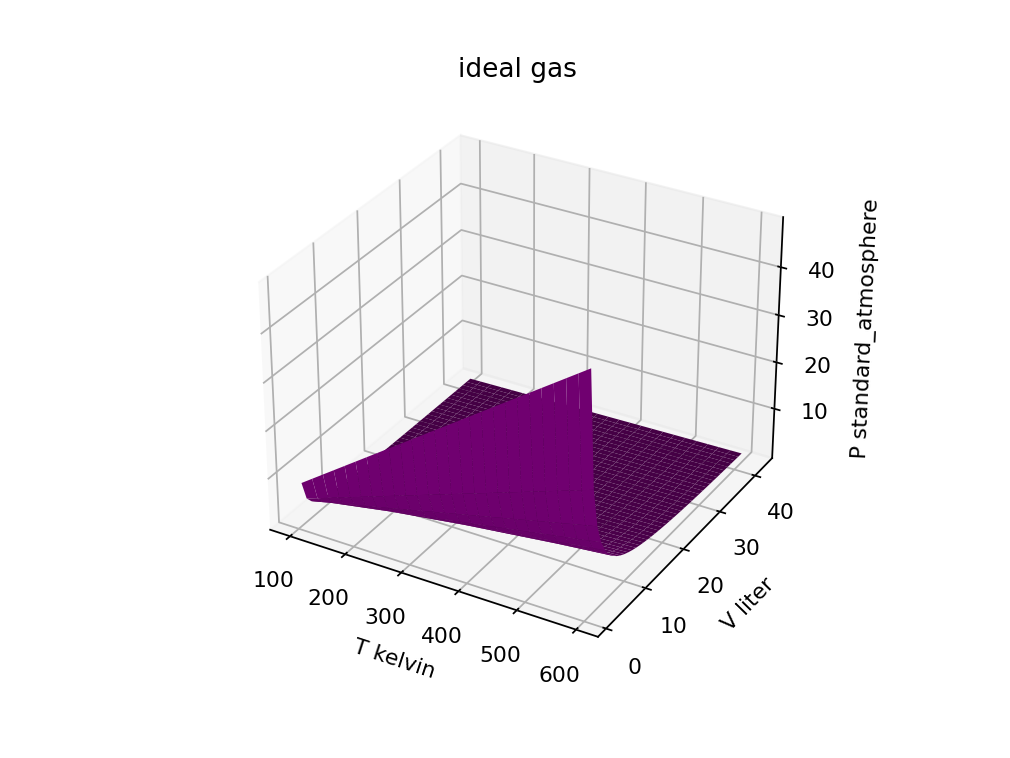

<Axes3DSubplot:title={'center':'ideal gas'}, xlabel='T kelvin', ylabel='V liter'>

In [8]:
# Get the pressure of an ideal gas
Pgrid_ideal = n*R*Tgrid/Vgrid
print("The units of pressure are "+str(Pgrid_ideal.units))
print('The shape of Pgrid_ideal is ', np.shape(Pgrid_ideal))

# Prepping the axis labels
xlabel = "T "+str(Tgrid.units)
ylabel = "V "+str(Vgrid.units) 
zlabel = "P "+str(Pgrid_ideal.units)
llist = [xlabel, ylabel, zlabel]

# Graph the pressure
PL.plot_surface1(Tgrid, Vgrid, Pgrid_ideal, color='purple',title='ideal gas',labellist=llist)

### Your turn - vdw
Using the same state space, make a new gridded variable Pgrid_vdw, for Argon gas. Don't forget to specify the units of vdw parameters $a$ and $b$. Also, make some reasonable labels for your axes.

For Helium
0.0346 bar * liter ** 2 / mole ** 2
0.0238 liter / mole
Predicted T_Boyle 17.485050629580833 kelvin 

For Nitrogen
1.37 bar * liter ** 2 / mole ** 2
0.0387 liter / mole
Predicted T_Boyle 425.7722519664477 kelvin 

For Neon
0.2135 bar * liter ** 2 / mole ** 2
0.01709 liter / mole
Predicted T_Boyle 150.25314429235414 kelvin 

For CO2
3.64 bar * liter ** 2 / mole ** 2
0.04267 liter / mole
Predicted T_Boyle 1025.9979504910293 kelvin 

For water
5.536 bar * liter ** 2 / mole ** 2
0.03049 liter / mole
Predicted T_Boyle 2183.7675564920896 kelvin 

For Argon
1.355 bar * liter ** 2 / mole ** 2
0.03201 liter / mole
Predicted T_Boyle 509.12142498221505 kelvin 

The units of pressure are standard_atmosphere


<IPython.core.display.Javascript object>


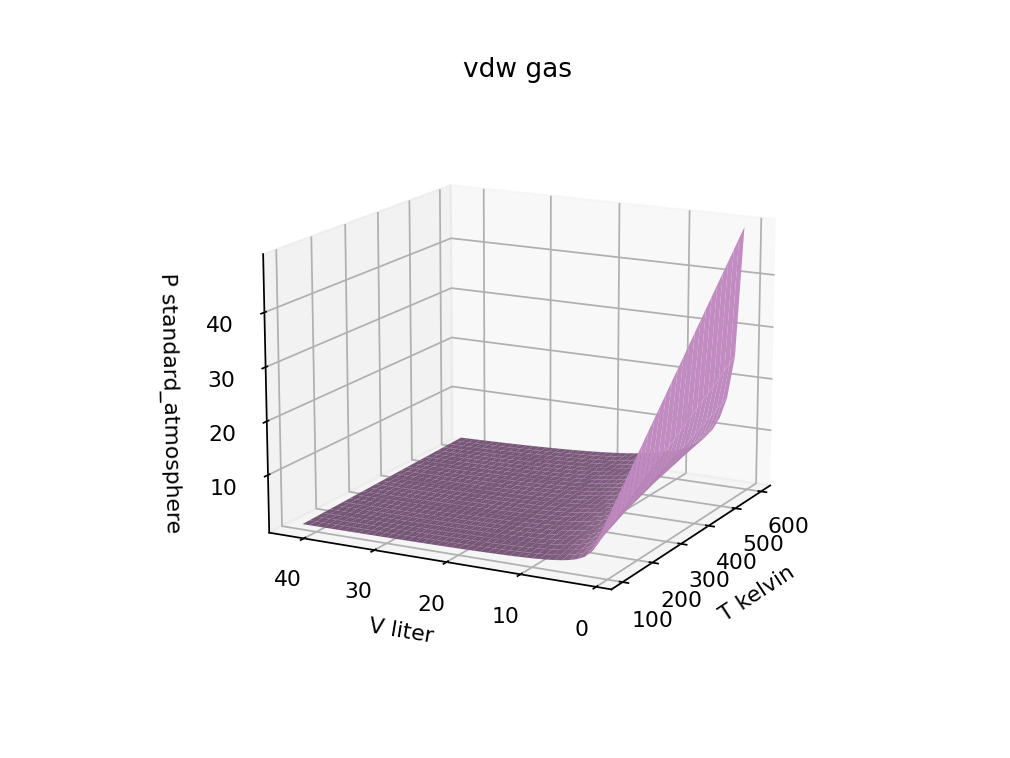

<Axes3DSubplot:title={'center':'vdw gas'}, xlabel='T kelvin', ylabel='V liter'>

In [9]:
# Assign a and b values (with units) for Argon gas
### BEGIN SOLUTION
# Helium
molecule = 'Helium'
print('For '+ molecule)
a = AssignQuantity(0.0346,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.0238,'L /mol'); print(b)
TBoyle = a/(b*R); TBoyle.ito('K')
print('Predicted T_Boyle', TBoyle, '\n')

# N2
molecule = 'Nitrogen'
print('For '+ molecule)
a = AssignQuantity(1.370,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.0387,'L /mol'); print(b)
TBoyle = a/(b*R); TBoyle.ito('K')
print('Predicted T_Boyle', TBoyle, '\n')

# Neon
molecule = 'Neon'
print('For '+ molecule)
a = AssignQuantity(0.2135,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.01709,'L /mol'); print(b)
TBoyle = a/(b*R); TBoyle.ito('K')
print('Predicted T_Boyle', TBoyle, '\n')

# CO2
molecule = 'CO2'
print('For '+ molecule)
a = AssignQuantity(3.640,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.04267,'L /mol'); print(b)
TBoyle = a/(b*R); TBoyle.ito('K')
print('Predicted T_Boyle', TBoyle, '\n')

# Water
molecule = 'water'
print('For '+ molecule)
a = AssignQuantity(5.536,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.03049,'L /mol'); print(b)
TBoyle = a/(b*R); TBoyle.ito('K')
print('Predicted T_Boyle', TBoyle, '\n')

# Ar
molecule = 'Argon'
print('For '+ molecule)
a = AssignQuantity(1.355,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.03201,'L /mol'); print(b)
TBoyle = a/(b*R); TBoyle.ito('K')
print('Predicted T_Boyle', TBoyle, '\n')
### END SOLUTION

# Calculate the van der Waals pressure as a state function on the same temperature-volume state space
### BEGIN SOLUTION
Pgrid_vdw = n*R*Tgrid/(Vgrid-n*b)-n**2*a/Vgrid**2
print("The units of pressure are "+str(Pgrid_vdw.units))
### END SOLUTION

# Graph the van der Waals pressure on the temperature-volume state space
### BEGIN SOLUTION
PL.plot_surface1(Tgrid, Vgrid, Pgrid_vdw, color='plum',title='vdw gas',labellist=llist)
### END SOLUTION

### Your challenge: Inspecting the deviation from ideal
In the cell below, calculate a new thermodynamic surface as the difference between the vdw and the ideal surfaces. You can use a command like this:

    Pgrid_diff = Pgrid_vdw - Pgrid_ideal
    
Then display *that* surface in a temperature-volume state space. Add appropriate labeling, etc.

standard_atmosphere


<IPython.core.display.Javascript object>


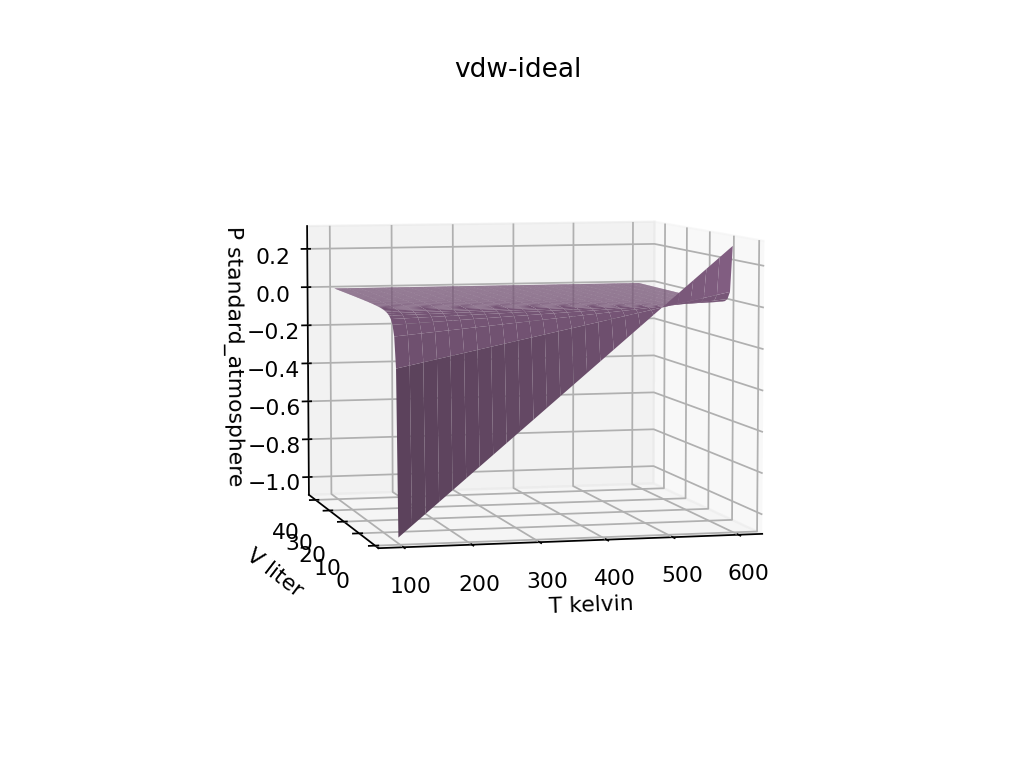

In [10]:
### BEGIN SOLUTION
Pgrid_vdw.ito("atm")
Pgrid_ideal.ito("atm")
Pgrid_diff = Pgrid_vdw - Pgrid_ideal
print(Pgrid_diff.units)

# Graph the pressure
PL.plot_surface1(Tgrid, Vgrid, Pgrid_diff, color='plum',title='vdw-ideal',labellist=llist)

Saving = False
if Saving:
    np.savetxt('.Pgrid1.txt', Pgrid_ideal)
    np.savetxt('.Pgrid2.txt', Pgrid_vdw)
    np.savetxt('.Vgrid.txt',  Vgrid)
    np.savetxt('.Tgrid.txt',  Tgrid)
### END SOLUTION

### Calculating the Boyle temperature
Use Eq. 3 in the Introduction to predict the Boyle temperature of your van der Waals gas, and print your result

    print("Predicted Boyle Temperature", TBoyle)
    
Since this result is probably not going to be in a unit you recognize, make a permanent conversion, as in

    TBoyle.ito('K')
    print("Predicted Boyle Temperature", TBoyle)

In [11]:
### BEGIN SOLUTION
TBoyle = a/(b*R)
print("Predicted Boyle Temperature", TBoyle)
print("Predicted Boyle Temperature", TBoyle.to('K'))    
### END SOLUTION

Predicted Boyle Temperature 515.8672838632293 bar * kelvin / standard_atmosphere
Predicted Boyle Temperature 509.12142498221505 kelvin


### Pause for Analysis
In the space below, comment on how close the Boyle temperature you just calculated (using Eq. 3) seems to come to switch-over temperature suggested by the thermodynamic surface Pgrid_diff. 

### One last refresh and save
We're at the end of the notebook. You should repeat the "Three steps for refreshing and saving your code" you did before. Instead of using the dropdown menu "Cell/Run All Above", however, you may as well use "Cell/Run All".

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Three steps for finishing up
Assuming all this has gone smoothly, there will be three more steps (but read this carefully before carrying them out):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page